In [98]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Conv1D
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from gensim.models import Word2Vec, Phrases
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 15)

# Vanilla RNN

![rnn](https://i.imgur.com/tsul5TY.png)

* Conventional RNN
* Usually with sigmoid activation
* is trained upon unfonding k-times using the BPTTalgorithm

Disadvantages
* upon multiple nestings sigmoid(-like) functions lead to exponential decay of error information
* vanishing gradient problem
* exploding gradient problem
* too simple architecture
* not flexible enoughfor both short and long-term dependencies
* too simplistic however still computationallyexpensive

# Natural Language Processing

Dataset \
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
df = pd.read_csv('./datasets./IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
print(df.review[2])

I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.


## Text normalization

Reduction of randomness in text. Bringing it closer to a predefined standard. Words can be written in multiple ways or mispelled, especially in social media.

### Cleaning

**Lowercasing all the words**

In [5]:
df.review = df.review.apply(lambda s: s.lower())
print(df.review[2])

i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.


**Cleaning noise like html tags and punctuation**

In [6]:
df.review = df.review.apply(lambda s: BeautifulSoup(s).get_text())
print(df.review[2])

i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i'd laughed at one of woody's comedies in years (dare i say a decade?). while i've never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.


In [7]:
pattern = r'[^a-zA-z0-9\s]'

df.review = df.review.apply(lambda s: re.sub(pattern, '', s))
print(df.review[2])

i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air conditioned theater and watching a lighthearted comedy the plot is simplistic but the dialogue is witty and the characters are likable even the well bread suspected serial killer while some may be disappointed when they realize this is not match point 2 risk addiction i thought it was proof that woody allen is still fully in control of the style many of us have grown to lovethis was the most id laughed at one of woodys comedies in years dare i say a decade while ive never been impressed with scarlet johanson in this she managed to tone down her sexy image and jumped right into a average but spirited young womanthis may not be the crown jewel of his career but it was wittier than devil wears prada and more interesting than superman a great comedy to go see with friends


### Tokenize

In [8]:
nltk.download('punkt')

df["review_tokens"] = df.review.apply(lambda s: nltk.word_tokenize(s))
print(df.review_tokens[2])

[nltk_data] Downloading package punkt to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'to', 'spend', 'time', 'on', 'a', 'too', 'hot', 'summer', 'weekend', ',', 'sitting', 'in', 'the', 'air', 'conditioned', 'theater', 'and', 'watching', 'a', 'light-hearted', 'comedy', '.', 'The', 'plot', 'is', 'simplistic', ',', 'but', 'the', 'dialogue', 'is', 'witty', 'and', 'the', 'characters', 'are', 'likable', '(', 'even', 'the', 'well', 'bread', 'suspected', 'serial', 'killer', ')', '.', 'While', 'some', 'may', 'be', 'disappointed', 'when', 'they', 'realize', 'this', 'is', 'not', 'Match', 'Point', '2', ':', 'Risk', 'Addiction', ',', 'I', 'thought', 'it', 'was', 'proof', 'that', 'Woody', 'Allen', 'is', 'still', 'fully', 'in', 'control', 'of', 'the', 'style', 'many', 'of', 'us', 'have', 'grown', 'to', 'love.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'This', 'was', 'the', 'most', 'I', "'d", 'laughed', 'at', 'one', 'of', 'Woody', "'s", 'comedies', 'in', 'years', '(', 'dare', 'I', 'say', 'a', 'decade', '?', ')', '.', 'While', 'I'

### Stop word removal

Stop words in english are low information words like "a, is, are" etc.

In [9]:
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df.review_tokens = df.review_tokens.apply(lambda s: [w for w in s if w not in stopwords])
print(df.review_tokens[2])

['thought', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'lighthearted', 'comedy', 'plot', 'simplistic', 'dialogue', 'witty', 'characters', 'likable', 'even', 'well', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', '2', 'risk', 'addiction', 'thought', 'proof', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'us', 'grown', 'lovethis', 'id', 'laughed', 'one', 'woodys', 'comedies', 'years', 'dare', 'say', 'decade', 'ive', 'never', 'impressed', 'scarlet', 'johanson', 'managed', 'tone', 'sexy', 'image', 'jumped', 'right', 'average', 'spirited', 'young', 'womanthis', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wears', 'prada', 'interesting', 'superman', 'great', 'comedy', 'go', 'see', 'friends']


### Stemming

Reducing words to their root or stem \

Example:
* connect -> connect
* connected -> connect
* connects -> connect


* trouble -> troubl
* troubles -> troubl

In [11]:
stemmer = nltk.stem.SnowballStemmer('english')

df['review_stem'] = df.review_tokens.apply(lambda s: [stemmer.stem(w) for w in s])
print(df.review_stem[2])

['thought', 'wonder', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sit', 'air', 'condit', 'theater', 'watch', 'lightheart', 'comedi', 'plot', 'simplist', 'dialogu', 'witti', 'charact', 'likabl', 'even', 'well', 'bread', 'suspect', 'serial', 'killer', 'may', 'disappoint', 'realiz', 'match', 'point', '2', 'risk', 'addict', 'thought', 'proof', 'woodi', 'allen', 'still', 'fulli', 'control', 'style', 'mani', 'us', 'grown', 'lovethi', 'id', 'laugh', 'one', 'woodi', 'comedi', 'year', 'dare', 'say', 'decad', 'ive', 'never', 'impress', 'scarlet', 'johanson', 'manag', 'tone', 'sexi', 'imag', 'jump', 'right', 'averag', 'spirit', 'young', 'womanthi', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wear', 'prada', 'interest', 'superman', 'great', 'comedi', 'go', 'see', 'friend']


### Lemmatization

Transform words to their root form

Example:
* connect -> connect
* connected -> connect
* connects -> connect


* trouble -> trouble
* troubles -> trouble

In [12]:
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = nltk.stem.WordNetLemmatizer()

df['review_lemm'] = df.review_tokens.apply(lambda s: [lemmatizer.lemmatize(w) for w in s])
print(df.review_lemm[2])

[nltk_data] Downloading package wordnet to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['thought', 'wonderful', 'way', 'spend', 'time', 'hot', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'lighthearted', 'comedy', 'plot', 'simplistic', 'dialogue', 'witty', 'character', 'likable', 'even', 'well', 'bread', 'suspected', 'serial', 'killer', 'may', 'disappointed', 'realize', 'match', 'point', '2', 'risk', 'addiction', 'thought', 'proof', 'woody', 'allen', 'still', 'fully', 'control', 'style', 'many', 'u', 'grown', 'lovethis', 'id', 'laughed', 'one', 'woodys', 'comedy', 'year', 'dare', 'say', 'decade', 'ive', 'never', 'impressed', 'scarlet', 'johanson', 'managed', 'tone', 'sexy', 'image', 'jumped', 'right', 'average', 'spirited', 'young', 'womanthis', 'may', 'crown', 'jewel', 'career', 'wittier', 'devil', 'wear', 'prada', 'interesting', 'superman', 'great', 'comedy', 'go', 'see', 'friend']


### Tagging

Enriching data with information about words, like tagging words with the part of speech. Example whether book is a verb or a noun.

In [13]:
nltk.download('tagsets')
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to C:\Users\Konrad
[nltk_data]     Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [14]:
nltk.download('averaged_perceptron_tagger')

df['tags'] = df.review_tokens.apply(lambda s: nltk.pos_tag(s))
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Konrad Ulman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,review,sentiment,review_tokens,review_stem,review_lemm,tags
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...","[one, reviewer, mentioned, watching, 1, oz, ep...","[(one, CD), (reviewers, NNS), (mentioned, VBD)..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...","[basically, there, family, little, boy, jake, ...","[(basically, RB), (theres, NNS), (family, NN),..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti..."


### N-Grams

Combination of N-Words or characters together

![Ngrams](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-23-11-42-12.png)

In [15]:
df['review_bigrams'] = df.review_tokens.apply(lambda s: list(nltk.bigrams(s)))
df['review_trigrams'] = df.review_tokens.apply(lambda s: list(nltk.ngrams(s, 3)))

df.head()

,review,sentiment,review_tokens,review_stem,review_lemm,tags,review_bigrams,review_trigrams
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...","[one, reviewer, mentioned, watching, 1, oz, ep...","[(one, CD), (reviewers, NNS), (mentioned, VBD)...","[(one, reviewers), (reviewers, mentioned), (me...","[(one, reviewers, mentioned), (reviewers, ment..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[(wonderful, little), (little, production), (p...","[(wonderful, little, production), (little, pro..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[(thought, wonderful), (wonderful, way), (way,...","[(thought, wonderful, way), (wonderful, way, s..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...","[basically, there, family, little, boy, jake, ...","[(basically, RB), (theres, NNS), (family, NN),...","[(basically, theres), (theres, family), (famil...","[(basically, theres, family), (theres, family,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti...","[(petter, matteis), (matteis, love), (love, ti...","[(petter, matteis, love), (matteis, love, time..."


## Text encoding

Converting text into number/vectors for machines, with preserving the context and relationship between words and sentences

### One-hot encoding

We create a set of all the words in the document collection, and the determine the presence or absence of a given word in particular document.

![onehot](https://miro.medium.com/max/2400/1*vmGi5tdY4fVKVBTtynaw7A.png)

In [19]:
le = LabelEncoder()
one_hot = OneHotEncoder(sparse=False)

num_encoded = le.fit_transform(df.review_tokens[2])
num_encoded = num_encoded.reshape(len(num_encoded), 1)
one_hot_encoded = one_hot.fit_transform(num_encoded)

print(one_hot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Frequency encoding

Similar to one-hot, with added count of how many particular word appeared in one document.

![frequency](https://miro.medium.com/max/2400/1*iLaVNRfJZYCGmOKdyUzp8w.png)

In [12]:
print(df.review_tokens[2])

freq = nltk.FreqDist(df.review_tokens[2])

pd.DataFrame(list(freq.items()), columns = ["Word","Frequency"]) 

['I', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'to', 'spend', 'time', 'on', 'a', 'too', 'hot', 'summer', 'weekend', ',', 'sitting', 'in', 'the', 'air', 'conditioned', 'theater', 'and', 'watching', 'a', 'light-hearted', 'comedy', '.', 'The', 'plot', 'is', 'simplistic', ',', 'but', 'the', 'dialogue', 'is', 'witty', 'and', 'the', 'characters', 'are', 'likable', '(', 'even', 'the', 'well', 'bread', 'suspected', 'serial', 'killer', ')', '.', 'While', 'some', 'may', 'be', 'disappointed', 'when', 'they', 'realize', 'this', 'is', 'not', 'Match', 'Point', '2', ':', 'Risk', 'Addiction', ',', 'I', 'thought', 'it', 'was', 'proof', 'that', 'Woody', 'Allen', 'is', 'still', 'fully', 'in', 'control', 'of', 'the', 'style', 'many', 'of', 'us', 'have', 'grown', 'to', 'love.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'This', 'was', 'the', 'most', 'I', "'d", 'laughed', 'at', 'one', 'of', 'Woody', "'s", 'comedies', 'in', 'years', '(', 'dare', 'I', 'say', 'a', 'decade', '?', ')', '.', 'While', 'I'

,Word,Frequency
0,I,5
1,thought,2
2,this,3
3,was,4
4,a,6
...,...,...
126,Superman,1
127,great,1
128,go,1
129,see,1


### TF-IDF - Term Frequency — Inverse Document Frequency

Defines how important a word is for a single document, while taking into account relation of all documents

In [20]:
df.head()

,review,sentiment,review_tokens,review_stem,review_lemm,tags,review_bigrams,review_trigrams
0,one of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...","[one, reviewer, mentioned, watching, 1, oz, ep...","[(one, CD), (reviewers, NNS), (mentioned, VBD)...","[(one, reviewers), (reviewers, mentioned), (me...","[(one, reviewers, mentioned), (reviewers, ment..."
1,a wonderful little production the filming tech...,positive,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass...","[wonderful, little, production, filming, techn...","[(wonderful, JJ), (little, JJ), (production, N...","[(wonderful, little), (little, production), (p...","[(wonderful, little, production), (little, pro..."
2,i thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su...","[(thought, VBN), (wonderful, JJ), (way, NN), (...","[(thought, wonderful), (wonderful, way), (way,...","[(thought, wonderful, way), (wonderful, way, s..."
3,basically theres a family where a little boy j...,negative,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...","[basically, there, family, little, boy, jake, ...","[(basically, RB), (theres, NNS), (family, NN),...","[(basically, theres), (theres, family), (famil...","[(basically, theres, family), (theres, family,..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,...","[(petter, NN), (matteis, RBS), (love, JJ), (ti...","[(petter, matteis), (matteis, love), (love, ti...","[(petter, matteis, love), (matteis, love, time..."


In [21]:
print(df.review_lemm[0])

['one', 'reviewer', 'mentioned', 'watching', '1', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'painted', 'mainstream', 'audience', 'forg

In [22]:
v = TfidfVectorizer()
x = v.fit_transform(df['review'])

In [23]:
d = pd.DataFrame(x[0].T.todense(), index=v.get_feature_names(), columns=["TF-IDF"])
d = d.sort_values('TF-IDF', ascending=False)
d.head(25)

,TF-IDF
oz,0.351949
violence,0.186586
wholl,0.174524
prison,0.171228
the,0.159295
inmates,0.157322
forget,0.146599
struck,0.131714
manyaryans,0.117072
romanceoz,0.117072


### Continous word representation

Word embedding, it involves the mathematical embedding from space with many dimensions per word to a continuous vector space with a much lower dimension

## Word embeddings

### Word2Vec

Transforms documents into numeric form while capturing their meaning

In [24]:
bigrams = Phrases(sentences=df.review_lemm)
trigrams = Phrases(sentences=bigrams[df.review_lemm])

In [36]:
%%time

embedding_vector_size = 256

word2vec_model = Word2Vec(
    sentences = trigrams[bigrams[df.review_lemm]],
    vector_size = embedding_vector_size,
    min_count=3, window=5, workers=4)

model.save("word2vec.model")

Wall time: 2min 50s


In [37]:
print("Vocabulary size:", len(word2vec_model.wv.key_to_index))

Vocabulary size: 80483


In [38]:
word2vec_model.wv.most_similar('idiotic')

[('ridiculous', 0.9112862348556519),
 ('inane', 0.9032710790634155),
 ('ludicrous', 0.8931168913841248),
 ('pathetic', 0.8929818272590637),
 ('unbelievable', 0.8838924169540405),
 ('useless', 0.8831961750984192),
 ('lame', 0.8814136981964111),
 ('illogical', 0.8803940415382385),
 ('laughable', 0.8796074986457825),
 ('moronic', 0.8705781102180481)]

### Glove

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

# Text classification - Sentiment

In [49]:
lb = LabelBinarizer()
sentiment = lb.fit_transform(df.sentiment)

In [55]:
keys = list(word2vec_model.wv.key_to_index.keys())
filter_none = lambda w: word2vec_model.wv.key_to_index.get(w, None) is not None
encode = lambda r: list(map(keys.index, filter(filter_none, r)))

In [82]:
input_length = 150

In [85]:
%%time
padded = pad_sequences(
    sequences = list(map(encode, trigrams[bigrams[df.review_lemm]])),
    maxlen = input_length,
    padding = 'pre')

Wall time: 19min 48s


In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    padded,
    sentiment,
    test_size=0.2,
    shuffle=True)

In [144]:
model = Sequential()

model.add(layers.Embedding(
    input_dim = word2vec_model.wv.vectors.shape[0],
    output_dim = word2vec_model.wv.vectors.shape[1], 
    input_length = input_length,
    weights = [word2vec_model.wv.vectors],
    trainable=False))
model.add(LSTM(64, activation="tanh", recurrent_dropout=0))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 150, 256)          20603648  
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                82176     
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 20,687,937
Trainable params: 84,289
Non-trainable params: 20,603,648
____________________________________

In [145]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = 'adam',
    metrics = ['accuracy'])

In [146]:
batch_size = 512
epochs = 50

In [147]:
earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    batch_size=batch_size,
    epochs=epochs)

Epoch 1/50
79/79 [==============================] - 5s 38ms/step - loss: 0.5781 - accuracy: 0.6839 - val_loss: 0.3735 - val_accuracy: 0.8409
Epoch 2/50
79/79 [==============================] - 3s 33ms/step - loss: 0.3931 - accuracy: 0.8392 - val_loss: 0.3493 - val_accuracy: 0.8496
Epoch 3/50
79/79 [==============================] - 3s 33ms/step - loss: 0.3483 - accuracy: 0.8535 - val_loss: 0.3241 - val_accuracy: 0.8611
Epoch 4/50
79/79 [==============================] - 3s 33ms/step - loss: 0.3258 - accuracy: 0.8642 - val_loss: 0.3283 - val_accuracy: 0.8651
Epoch 5/50
79/79 [==============================] - 3s 33ms/step - loss: 0.3132 - accuracy: 0.8687 - val_loss: 0.3111 - val_accuracy: 0.8661
Epoch 6/50
79/79 [==============================] - 3s 34ms/step - loss: 0.3008 - accuracy: 0.8738 - val_loss: 0.3058 - val_accuracy: 0.8705
Epoch 7/50
79/79 [==============================] - 3s 33ms/step - loss: 0.2922 - accuracy: 0.8804 - val_loss: 0.2942 - val_accuracy: 0.8741
Epoch 8/50
79

In [ ]:
def plot_loss(his):
    loss_values = his['loss']
    val_loss_values = his['val_loss']
    epochs = range(1, len(loss_values) + 1)

    line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
    line2 = plt.plot(epochs, loss_values, label='Training Loss')
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()
    
def plot_acc(his):
    acc_values = his['accuracy']
    acc_loss_values = his['val_accuracy']
    epochs = range(1, len(acc_values) + 1)

    line1 = plt.plot(epochs, acc_loss_values, label='Validation/Test Accuracy')
    line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
    plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
    plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

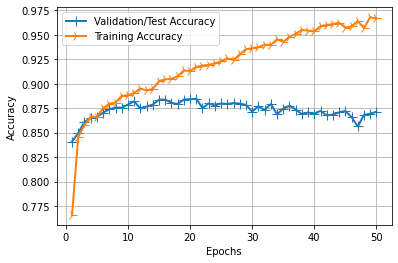

In [148]:
plot_acc(history.history)

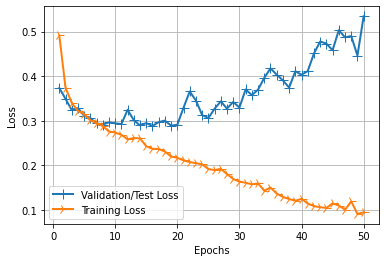

In [149]:
plot_loss(history.history)

In [150]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5346 - accuracy: 0.8714


# Time series

Monthly beer production from https://www.kaggle.com/shenba/time-series-datasets

In [124]:
df = pd.read_csv('./datasets/monthly-beer-production-in-austr.csv', usecols=[1], engine='python')
df.head()

,Monthly beer production
0,93.2
1,96.0
2,95.2
3,77.1
4,70.9


In [125]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

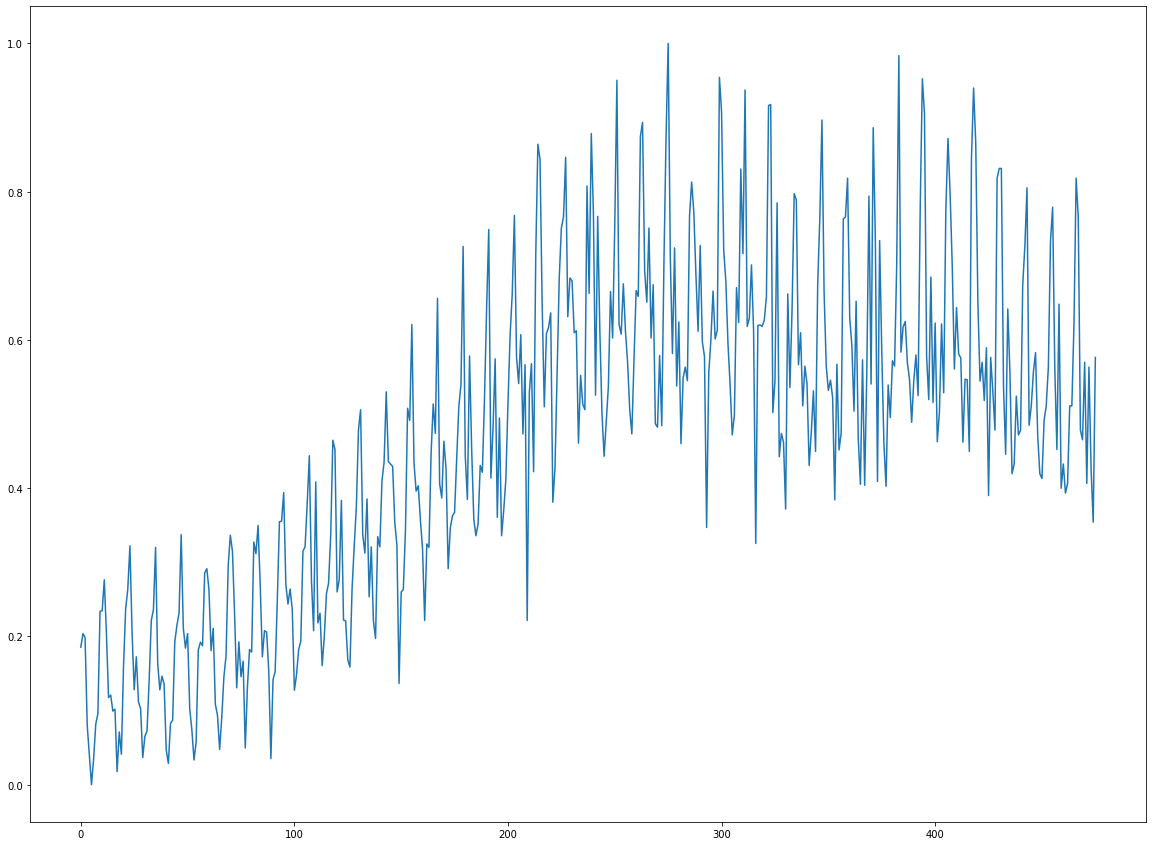

In [126]:
plt.plot(df)
plt.show()

In [127]:
n = len(df)
train_df = df[0:int(n*0.8)]
test_df = df[int(n*0.8):]

In [128]:
def time_generator(dataset):
    x, y = [], []
    for i in range(len(dataset) - 1):
        a = dataset[i:(i + 1), 0]
        x.append(a)
        y.append(dataset[i + 1, 0])
    
    return np.array(x), np.array(y)

In [129]:
train_x, train_y = time_generator(train_df)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))

test_x, test_y = time_generator(test_df)
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [130]:
model = Sequential()

model.add(LSTM(200, activation='tanh', input_shape=(1, 1)))
model.add(Dense(1))

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 200)               161600    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
model.compile(optimizer='adam', loss='mse')

In [132]:
history = model.fit(train_x, train_y, epochs=20, batch_size=1, verbose=True)

Epoch 1/20
379/379 [==============================] - 3s 4ms/step - loss: 0.0754
Epoch 2/20
379/379 [==============================] - 1s 4ms/step - loss: 0.0162
Epoch 3/20
379/379 [==============================] - 1s 4ms/step - loss: 0.0130
Epoch 4/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0198
Epoch 5/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0168
Epoch 6/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0156
Epoch 7/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0163
Epoch 8/20
379/379 [==============================] - 2s 5ms/step - loss: 0.0159
Epoch 9/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0159
Epoch 10/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0155
Epoch 11/20
379/379 [==============================] - 2s 4ms/step - loss: 0.0157
Epoch 12/20
379/379 [==============================] - 1s 4ms/step - loss: 0.0142
Epoch 13/20
379/379 [====

In [133]:
def plot_loss(his):
    loss_values = his['loss']
    epochs = range(1, len(loss_values) + 1)

    line2 = plt.plot(epochs, loss_values, label='Training Loss')
    plt.setp(line2, linewidth=2.0, marker = '+', markersize=10.0)
    plt.xlabel('Epochs') 
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()
    plt.show()

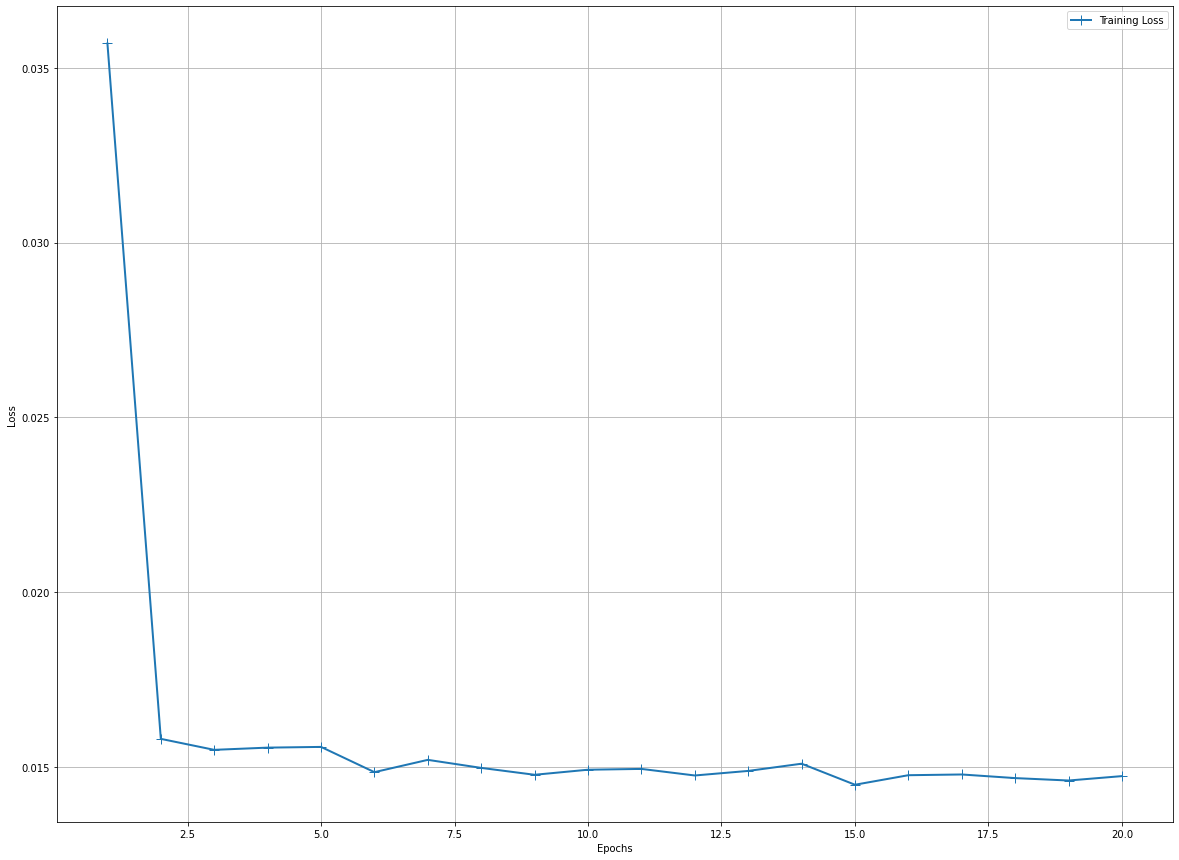

In [134]:
plot_loss(history.history)

In [135]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [136]:
predict_train = scaler.inverse_transform(predict_train)
train_y = scaler.inverse_transform([train_y])

predict_test = scaler.inverse_transform(predict_test)
test_y = scaler.inverse_transform([test_y])

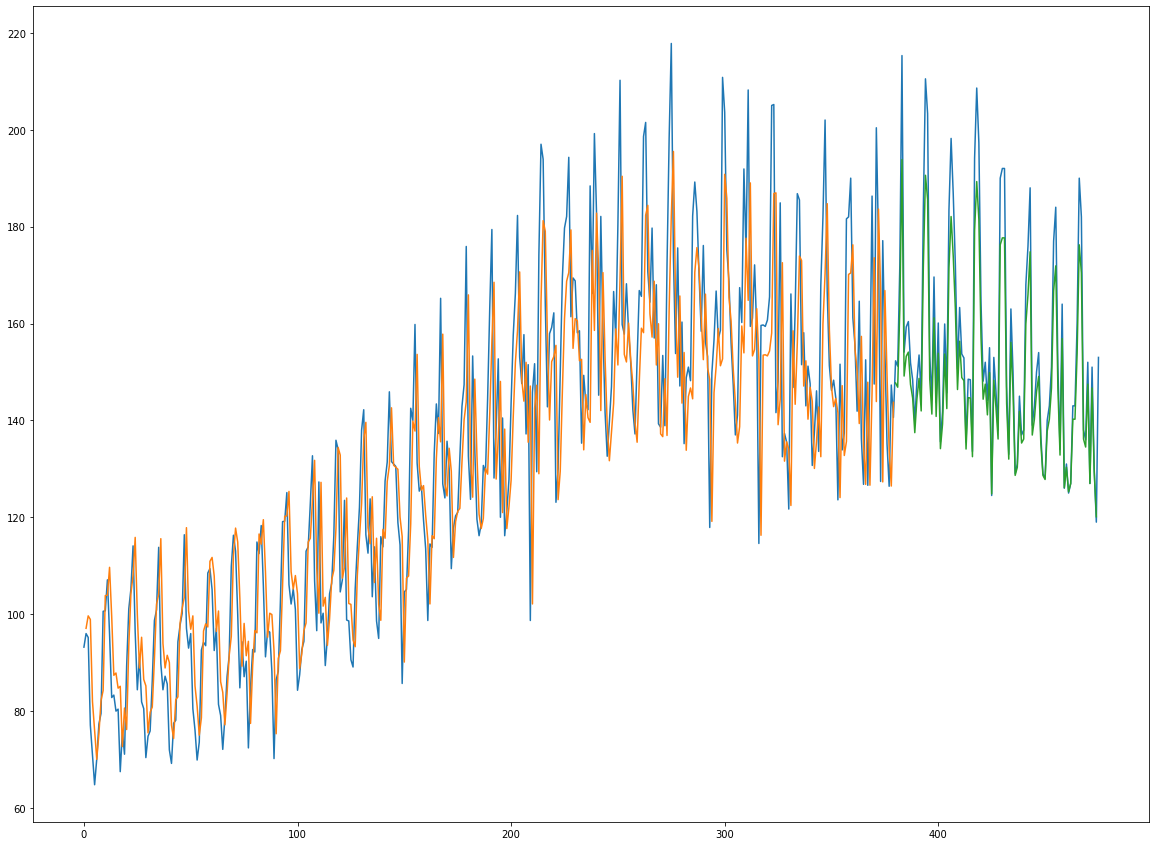

In [155]:
predict_train_plot = np.empty_like(df)
predict_train_plot[:, :] = np.nan
predict_train_plot[1:len(predict_train) + 1, :] = predict_train

predict_test_plot = np.empty_like(df)
predict_test_plot[:, :] = np.nan
predict_test_plot[len(predict_train) + 1:len(df) - 1, :] = predict_test

plt.plot(scaler.inverse_transform(df))
plt.plot(predict_train_plot)
plt.plot(predict_test_plot)
plt.show()

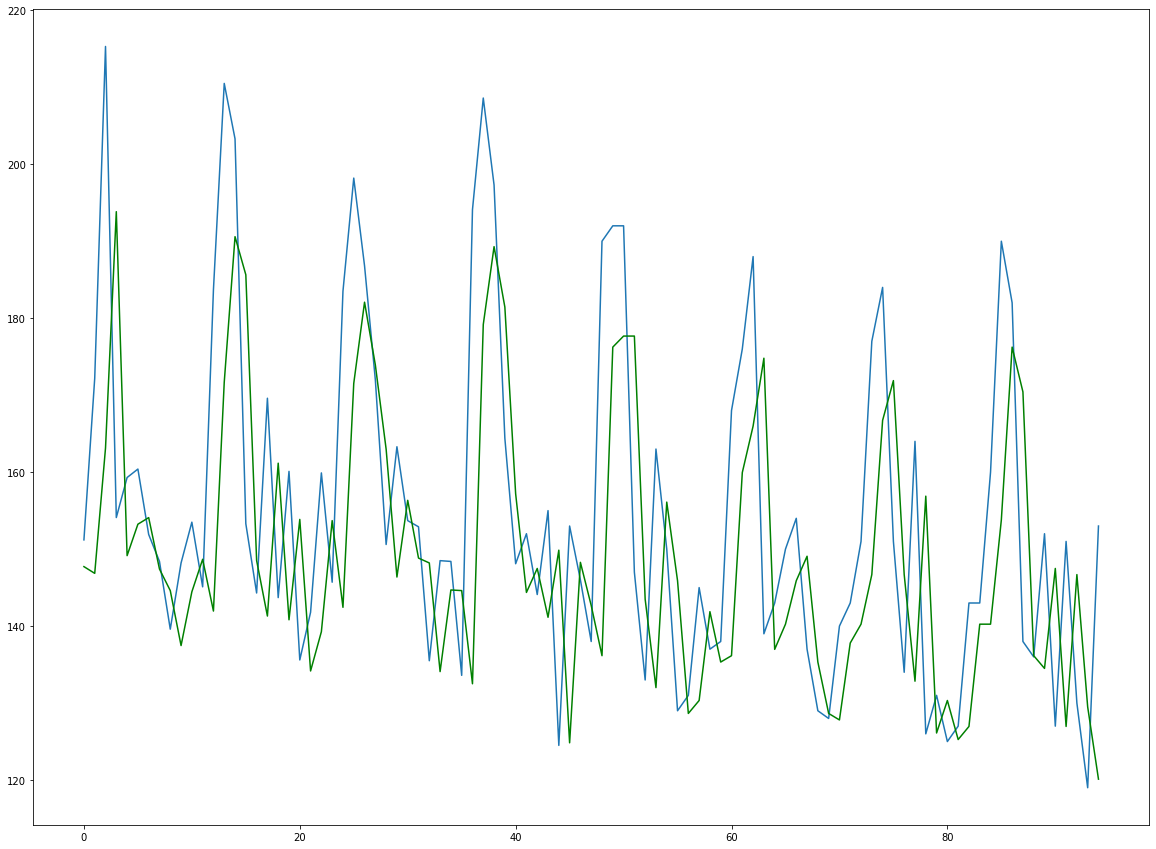

In [161]:
predict_test_plot = np.empty_like(df)

plt.plot(scaler.inverse_transform(df[-len(predict_test):]))
plt.plot(predict_test, c="green")
plt.show()

# Generating text

# Translating text